In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan_data.csv')
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
df.isnull().sum().any()

False

CONCLUSION :
- There are no null values in the dataset.

In [ ]:
df.duplicated().sum()

0

CONCLUSION :
- There are no duplicate values in the dataset.

1. Descriptive Statistics:
- What are the mean, median, and standard deviations of numeric features such as int.rate , installment , log.annual.inc , dti , fico , days.with.cr.line , revol.bal , and
revol.util ?

In [ ]:
analysis = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
                               'days.with.cr.line', 'revol.bal', 'revol.util']].agg(['mean', 'median', 'std'])

analysis

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,16913.963876,46.799236
median,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8596.000000,46.300000
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,33756.189557,29.014417


Conclusion:

1.) The mean and median of columns like - 'int.rate','log.annual.inc','dti','fico','revol.util' are almost same, it shows that the data of these columns follows a normal distribution, i.e; it suggests a predictable, symmetric pattern where most data points cluster around the mean.

2.) The columns like 'installment','days.with.cr.line' and 'revol.bal' have mean greater than median, indicates that the data is positively skewed or right-skewed. There are some outliers present which is pulling the mean to right side.

2. Distribution Analysis:
- Analyze the distribution of fico scores among borrowers. What does the distribution tell us about the creditworthiness of the majority of the borrowers?

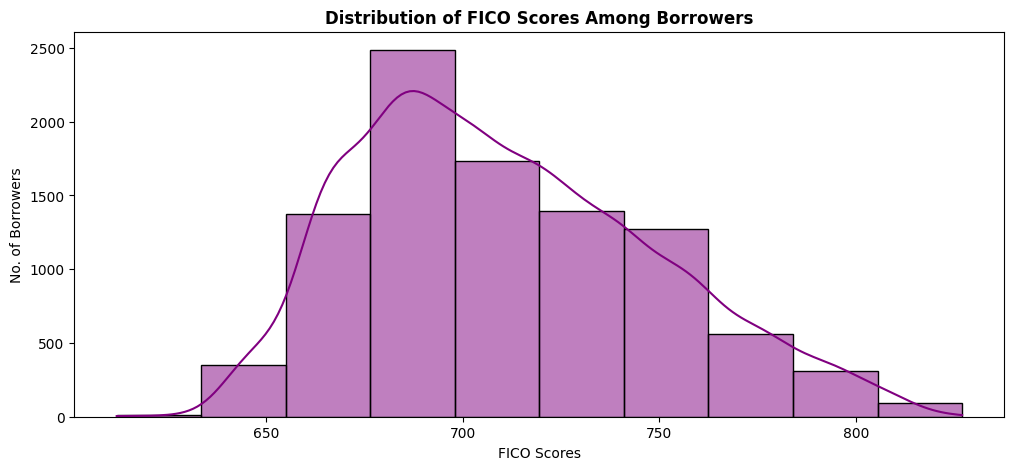

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['fico'],bins=10,kde=True,color='Purple',edgecolor='black')
plt.title('Distribution of FICO Scores Among Borrowers',fontweight='bold')
plt.xlabel('FICO Scores')
plt.ylabel('No. of Borrowers')
plt.show()

Conclusion:

The data here is following almost a "Normal Distribution", i.e; there are no or vey few otliers(close to zero) present in the dataset and the data is almost centered towards mean.


In [ ]:
X = df['fico'].agg(['mean','median','std'])
X

,fico
mean,710.846314
median,707.000000
std,37.970537


- The average borrower’s FICO score is around 710

- With a high mean and median and a moderate standard deviation, there are likely few borrowers with very low credit scores. This suggests that the dataset consists mostly of borrowers with good credit.

3. Correlation Analysis:
- Which variables are strongly correlated to int.rate ? How do these relationships affect the interpretation of the loan terms?

In [ ]:
Correlation = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']].corr()


In [ ]:
Correlation['int.rate'].sort_values(ascending=False)

,int.rate
int.rate,1.000000
revol.util,0.464837
installment,0.276140
dti,0.220006
revol.bal,0.092527
log.annual.inc,0.056383
days.with.cr.line,-0.124022
fico,-0.714821


Correlation:

1.) FICO Score (fico):

Correlation: -0.714821
- There is a strong negative correlation between the FICO score and the interest rate. This means that as the FICO score increases, the interest rate tends to decrease.

2.) Installment :

Correlation: 0.276140
- There is a weak positive correlation between installment amounts and the interest rate i.e; Larger installment payments are very less associated with higher interest rates, but the relationship is not strong.

3.) Other columns has very low correlation values showing that they are having no or very less impact on intrest rate.

4. Credit Policy Compliance:
- Compare the characteristics of borrowers who meet the credit policy ( credit.policy == 1 ) versus those who do not. What are the key differences?

In [ ]:
credit_policy_one = df[df['credit.policy'] == 1]
credit_policy_zero = df[df['credit.policy'] == 0]

In [ ]:
credit_policy_one_description = credit_policy_one[['fico', 'int.rate', 'dti', 'log.annual.inc', 'installment']].describe()
credit_policy_zero_description = credit_policy_zero[['fico', 'int.rate', 'dti', 'log.annual.inc', 'installment']].describe()

In [ ]:
credit_policy_one_description

,fico,int.rate,dti,log.annual.inc,installment
count,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000
mean,717.356031,0.118754,12.298684,10.942680,325.079200
std,36.630697,0.025571,6.627485,0.585371,205.611447
min,627.000000,0.060000,0.000000,8.294050,15.690000
25%,687.000000,0.097600,7.130000,10.596535,166.500000
50%,712.000000,0.118900,12.380000,10.933107,278.605000
75%,742.000000,0.135700,17.520000,11.289819,447.747500
max,827.000000,0.212100,29.420000,14.528354,918.020000


In [ ]:
credit_policy_zero_description

,fico,int.rate,dti,log.annual.inc,installment
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,683.978051,0.138680,13.877901,10.888520,294.367115
std,30.950970,0.026032,7.727552,0.722315,211.256726
min,612.000000,0.060000,0.000000,7.547502,15.670000
25%,657.000000,0.122200,7.757500,10.463103,138.867500
50%,682.000000,0.138700,14.085000,10.896739,240.610000
75%,702.000000,0.154500,19.945000,11.314475,392.840000
max,807.000000,0.216400,29.960000,13.458836,940.140000


Conclusions:

1.) Borrowers who meet the credit policy have a higher average FICO score (717.36) than those who don't meet the credit policy(683.98), indicating they are generally more creditworthy.

2.) The standard deviation is lower for those who do not meet the credit policy.

3.) Borrowers who meet the credit policy are offered lower interest rates on average (11.88%) than those who don;t (13.87%).

4.) Borrowers who meet the credit policy have a slightly higher average income (10.94 vs. 10.89).

5.) Borrowers who meet the credit policy tend to have higher monthly installments ($325.08 vs. $294.37).

5. Purpose of Loans:
- What is the most common purpose for the loans? How do loan characteristics vary with the purpose?

In [ ]:
purpose_counts = df['purpose'].value_counts()
purpose_counts

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


It shows that the most common purpose for loans is 'debt_consolidation' whereas the least common purpose for loans is 'educational'.

In [ ]:
loan_purpose = df.groupby('purpose')[['int.rate', 'fico', 'installment', 'dti']].describe()
loan_purpose.T

purpose              all_other  credit_card  debt_consolidation  educational  \
int.rate    count  2331.000000  1262.000000         3957.000000   343.000000   
            mean      0.116771     0.119738            0.126595     0.119907   
            std       0.027152     0.024906            0.024769     0.026551   
            min       0.063900     0.060000            0.060000     0.060000   
            25%       0.093200     0.100800            0.111400     0.097600   
            50%       0.118300     0.118900            0.128000     0.121800   
            75%       0.135500     0.135700            0.142600     0.135700   
            max       0.216400     0.208600            0.212100     0.201100   
fico        count  2331.000000  1262.000000         3957.000000   343.000000   
            mean    715.344058   709.626783          703.871367   708.282799   
            std      40.059548    35.590267           34.397778    38.365188   
            min     632.000000   627.000000          612.000000   612.000000   
            25%     682.000000   682.000000          677.000000   677.000000   
            50%     712.000000   707.000000          697.000000   707.000000   
            75%     742.000000   737.000000          727.000000   737.000000   
            max     822.000000   812.000000          822.000000   807.000000   
installment count  2331.000000  1262.000000         3957.000000   343.000000   
            mean    244.937542   319.500713          358.984390   217.547201   
            std     184.272991   198.228995          198.309002   168.505475   
            min      15.690000    16.730000           23.210000    15.670000   
            25%     111.580000   171.150000          201.520000    99.925000   
            50%     190.630000   266.675000          325.080000   169.620000   
            75%     319.470000   426.110000          491.300000   278.430000   
            max     916.950000   922.420000          940.140000   861.880000   
dti         count  2331.000000  1262.000000         3957.000000   343.000000   
            mean     11.079498    14.099398           14.076462    11.344927   
            std       7.099443     6.474297            6.433460     6.939110   
            min       0.000000     0.000000            0.000000     0.000000   
            25%       5.005000     9.182500            9.200000     5.425000   
            50%      10.560000    14.380000           14.240000    11.420000   
            75%      16.560000    19.220000           19.130000    16.385000   
            max      29.900000    29.950000           29.960000    29.740000   

purpose            home_improvement  major_purchase  small_business  
int.rate    count        629.000000      437.000000      619.000000  
            mean           0.117507        0.114171        0.138087  
            std            0.026889        0.027445        0.031191  
            min            0.060000        0.070500        0.071400  
            25%            0.094500        0.089400        0.114600  
            50%            0.118300        0.115800        0.137900  
            75%            0.134800        0.134800        0.160000  
            max            0.216400        0.201700        0.212100  
fico        count        629.000000      437.000000      619.000000  
            mean         724.806041      722.503432      719.988691  
            std           43.561991       41.098429       37.768905  
            min          632.000000      642.000000      642.000000  
            25%          687.000000      687.000000      692.000000  
            50%          722.000000      722.000000      717.000000  
            75%          757.000000      757.000000      747.000000  
            max          827.000000      817.000000      822.000000  
installment count        629.000000      437.000000      619.000000  
            mean         337.071590      243.483913      433.826607  
            std          222.

6. Interest Rate Variations:
- How does the interest rate vary across different loan purposes and FICO scores?

In [ ]:
int_rates_across_purposes = df.groupby('purpose')['int.rate'].mean().sort_values(ascending=False)
int_rates_across_purposes

,int.rate
purpose,
small_business,0.138087
debt_consolidation,0.126595
educational,0.119907
credit_card,0.119738
home_improvement,0.117507
all_other,0.116771
major_purchase,0.114171


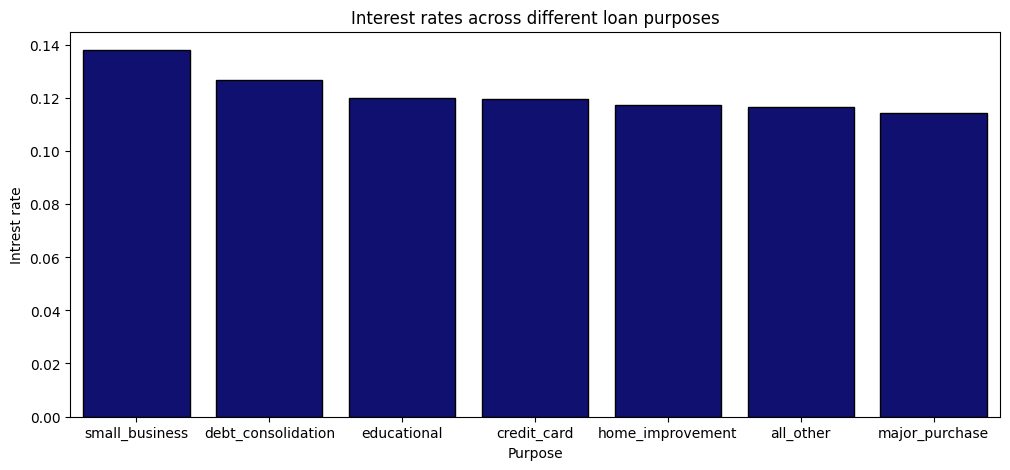

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=int_rates_across_purposes.index,y=int_rates_across_purposes.values,color='navy',edgecolor='black')
plt.title('Interest rates across different loan purposes')
plt.xlabel('Purpose')
plt.ylabel('Intrest rate')
plt.show()

Conclusion:

Intrest rates are not too much varying across different loan purposes. Where small_business is having max. intrest rates followed by debt_consolidation and educational purposes, major purchase being at the bottom with least intrest rates.

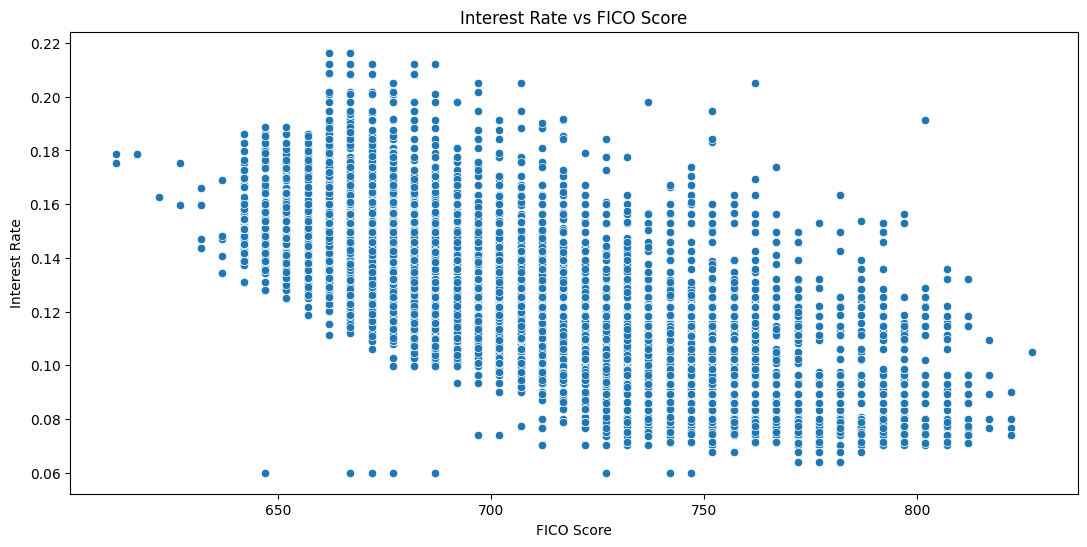

In [ ]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x='fico', y='int.rate', data=df)
plt.title('Interest Rate vs FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()


CONCLUSION :

1.) Higher FICO scores leads to lower interest rates.


7. Income Analysis:
- Explore the relationship between borrowers' income (using log.annual.inc ) and their loan characteristics such as amount, purpose, and interest rate.

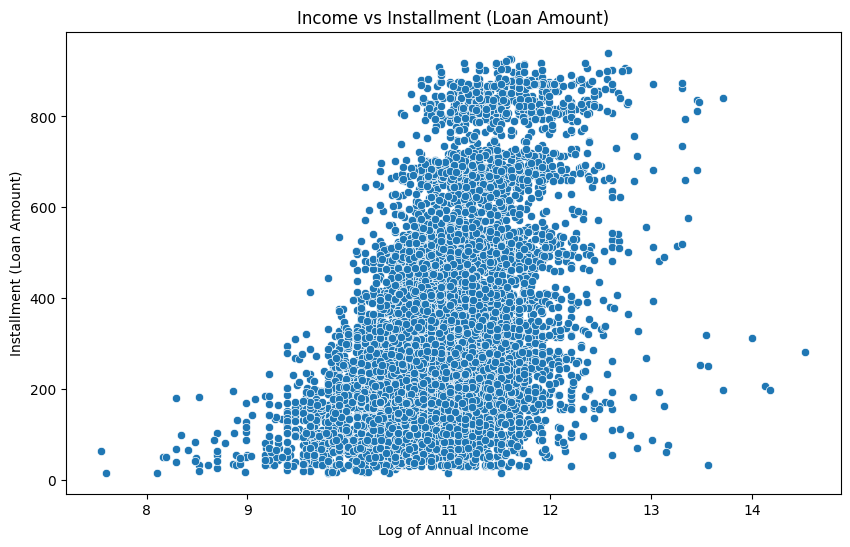

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log.annual.inc', y='installment', data=df, palette='Oranges')
plt.title('Income vs Installment (Loan Amount)')
plt.xlabel('Log of Annual Income')
plt.ylabel('Installment (Loan Amount)')
plt.show()

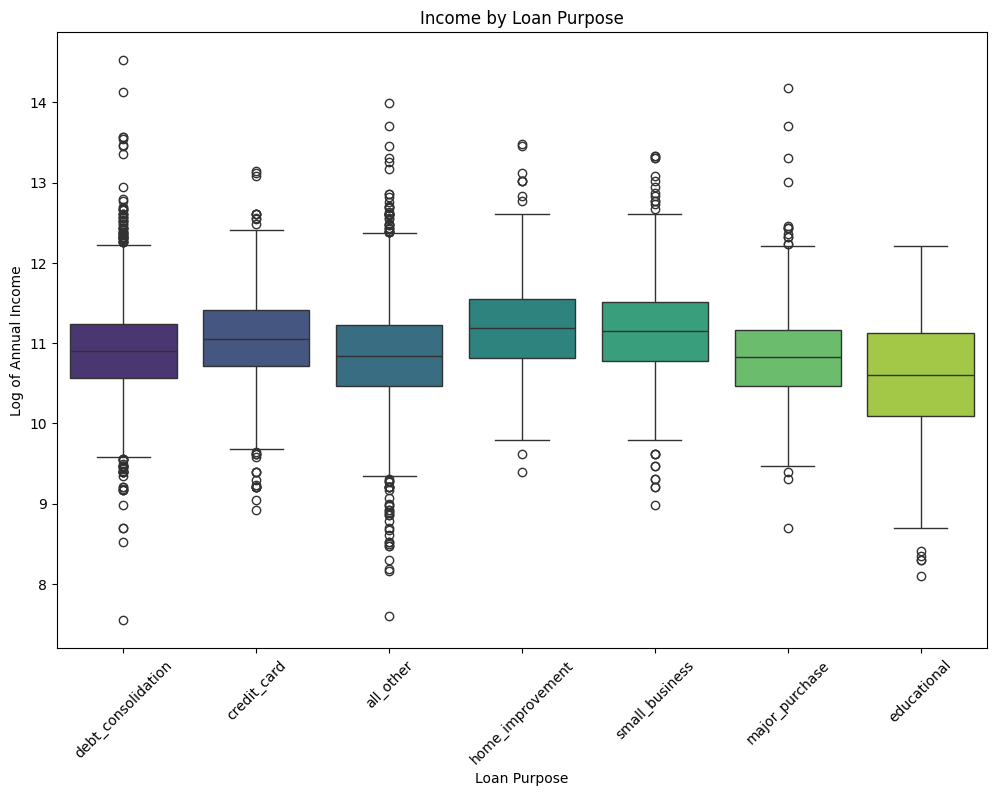

In [ ]:
# Box plot of Income by Loan Purpose
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='log.annual.inc', data=df,palette='viridis')
plt.title('Income by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Log of Annual Income')
plt.xticks(rotation=45)
plt.show()

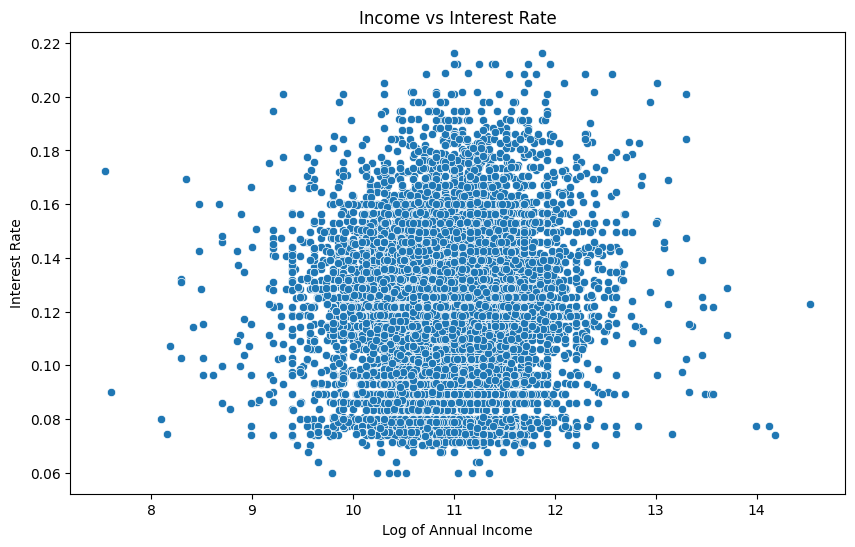

In [ ]:
# Scatter plot of Income vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log.annual.inc', y='int.rate', data=df, palette='Accent')
plt.title('Income vs Interest Rate')
plt.xlabel('Log of Annual Income')
plt.ylabel('Interest Rate')
plt.show()

CONCLUSIONs :

1.) Higher income results in larger loan installments.
2.) Borrowers with debt consolidation loans tend to have more existing debt.
3.) Income level seems to have little impact on interest rates offered.

8. Debt to Income Ratio:
- What insights can be derived from analyzing the dti (debt-to-income ratio) across different loan purposes?

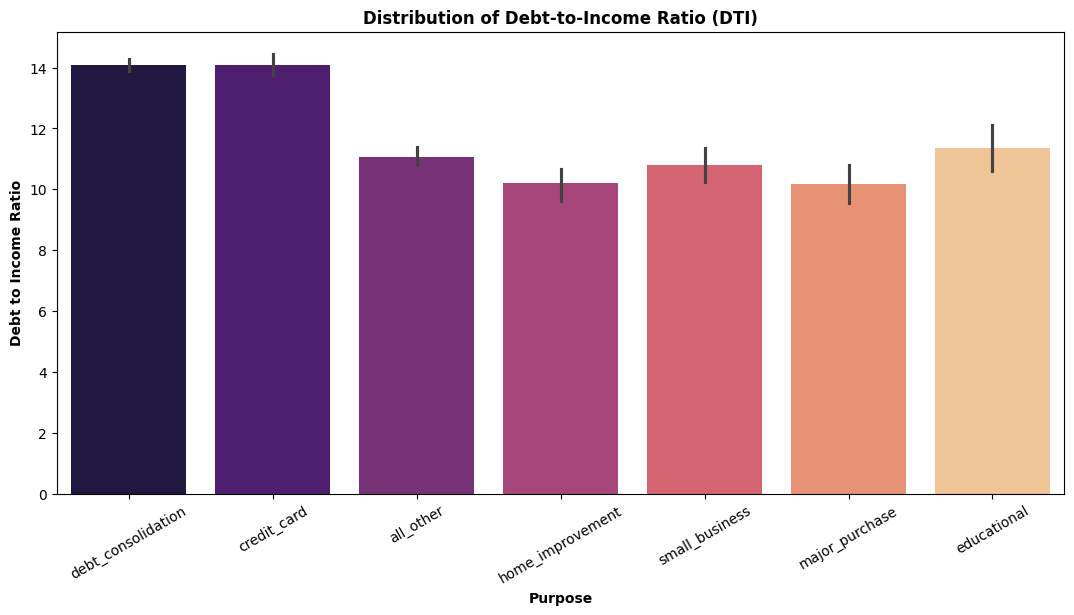

In [ ]:
# Distribution of Debt-to-Income Ratio (dti)
plt.figure(figsize=(13, 6))
sns.barplot(y='dti',x='purpose',data=df, palette='magma')
plt.title('Distribution of Debt-to-Income Ratio (DTI)',fontweight='bold')
plt.xlabel('Purpose',fontweight='bold')
plt.ylabel('Debt to Income Ratio',fontweight='bold')
plt.xticks(rotation=30)
plt.show()

CONCLUSION :

Borrowers with the purpose of debt-consolidation and credit-card have the highest debt-to-income ratio, as both the bars are almost similar.

9. Delinquency Patterns:
- What patterns can be observed in terms of delinquency ( delinq.2yrs ) across different FICO score ranges?

In [ ]:
# Define FICO score ranges and categorize borrowers
fico_bins = [300, 500, 600, 700, 800, 850]
fico_labels = ['300-500', '500-600', '600-700', '700-800', '800+']
df['fico_range'] = pd.cut(df['fico'], bins=fico_bins, labels=fico_labels, right=False)

In [ ]:
# Calculate average delinquencies within each FICO score range
avg_delinq_by_fico = df.groupby('fico_range')['delinq.2yrs'].mean()

In [ ]:
avg_delinq_by_fico

,delinq.2yrs
fico_range,
300-500,NaN
500-600,NaN
600-700,0.285951
700-800,0.069263
800+,0.000000


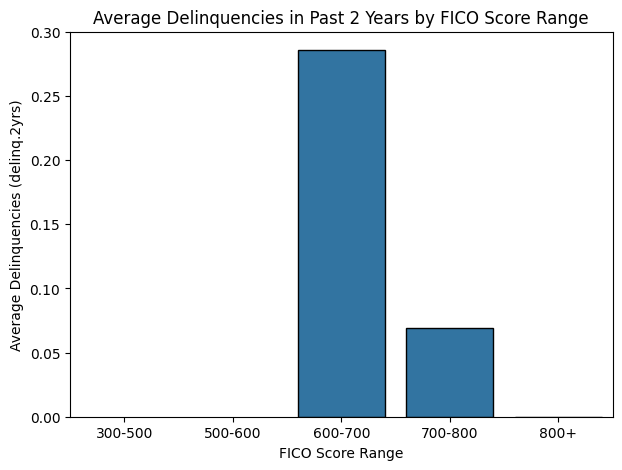

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=avg_delinq_by_fico.index, y=avg_delinq_by_fico.values, edgecolor='black')
plt.title('Average Delinquencies in Past 2 Years by FICO Score Range')
plt.xlabel('FICO Score Range')
plt.ylabel('Average Delinquencies (delinq.2yrs)')
plt.show()

CONCLUSION :
- Credit score is strongly correlated with delinquency rate.
- Borrowers with lower FICO scores have significantly higher delinquency rates compared to those with higher scores.
- This suggests that creditworthiness is a crucial factor in predicting repayment behavior.

10. Public Records Analysis:
- How does having derogatory public records ( pub.rec ) impact the loan characteristics such as interest rates and loan amount?

In [ ]:
# Impact of Public Records on Interest Rates
avg_int_rate_by_pub_rec = df.groupby('pub.rec')['int.rate'].mean()

In [ ]:
avg_int_rate_by_pub_rec

,int.rate
pub.rec,
0,0.121987
1,0.132721
2,0.142363
3,0.139960
4,0.157000
5,0.141800


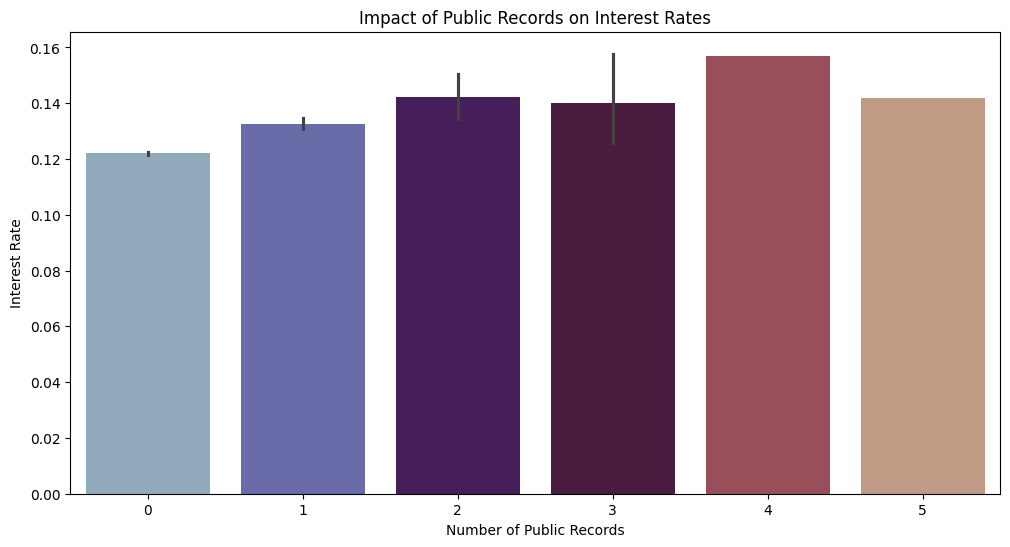

In [ ]:
# Visualizing the Impact of Public Records on Interest Rates
plt.figure(figsize=(12, 6))
sns.barplot(x='pub.rec', y='int.rate', data=df, palette='twilight')
plt.title('Impact of Public Records on Interest Rates')
plt.xlabel('Number of Public Records')
plt.ylabel('Interest Rate')
plt.show()

In [ ]:
# Impact of Public Records on Loan Amounts (using Installment as a proxy)
avg_installment_by_pub_rec = df.groupby('pub.rec')['installment'].mean()

In [ ]:
avg_installment_by_pub_rec

,installment
pub.rec,
0,320.694233
1,295.861782
2,231.560526
3,233.038000
4,350.110000
5,287.830000


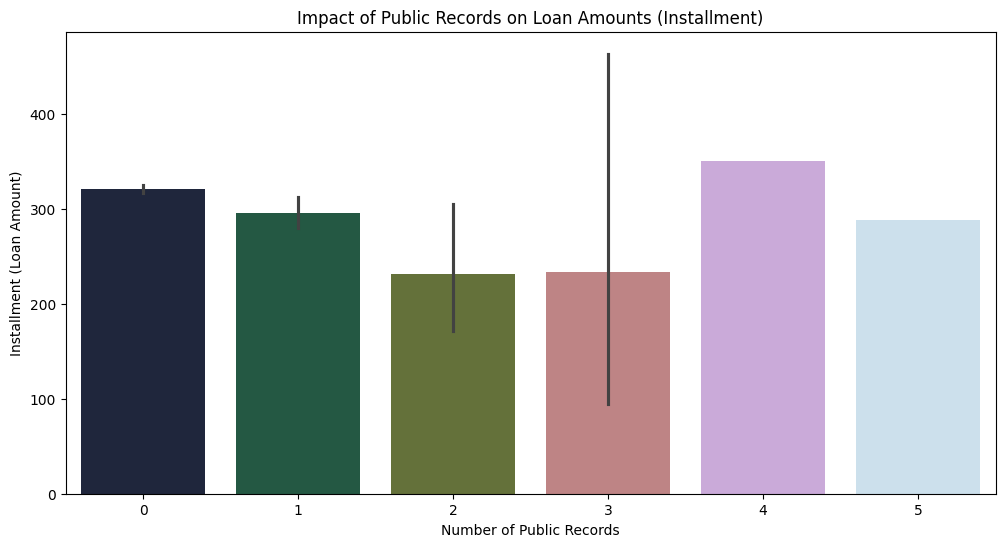

In [ ]:
# Visualizing the Impact of Public Records on Loan Amounts
plt.figure(figsize=(12, 6))
sns.barplot(x='pub.rec', y='installment', data=df, palette='cubehelix')
plt.title('Impact of Public Records on Loan Amounts (Installment)')
plt.xlabel('Number of Public Records')
plt.ylabel('Installment (Loan Amount)')
plt.show()

CONCLUSION :
- Borrowers with more public records might be charged higher interest rates, reflecting the increased risk they pose to lenders.
- Borrowers with public records might receive smaller loan amounts.